# Lab | Random variable distributions

#### Instructions

1. Use the numerical variables from our dataset this week.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
numerical_data = pd.read_csv('numerical.csv')
numerical_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


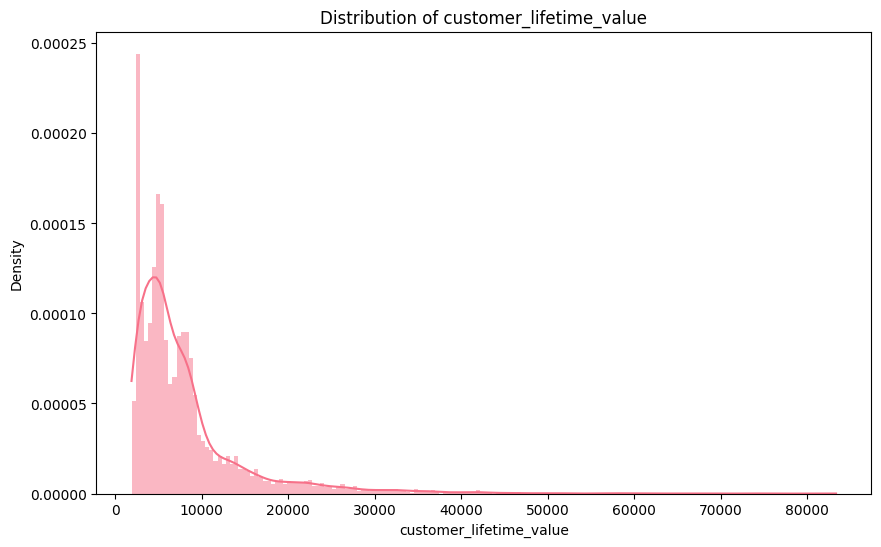

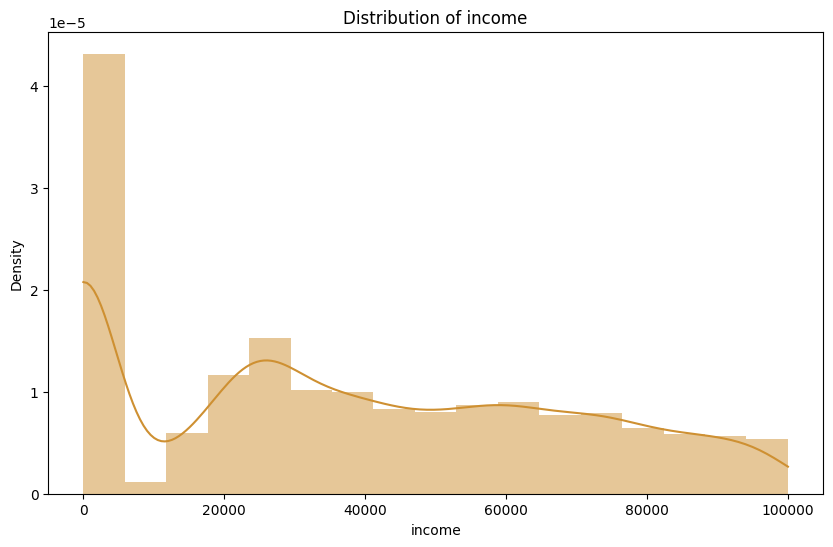

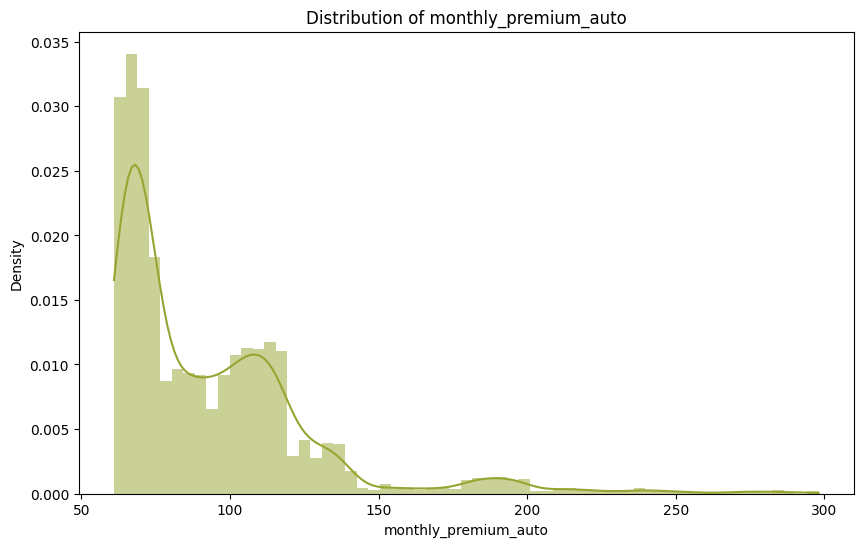

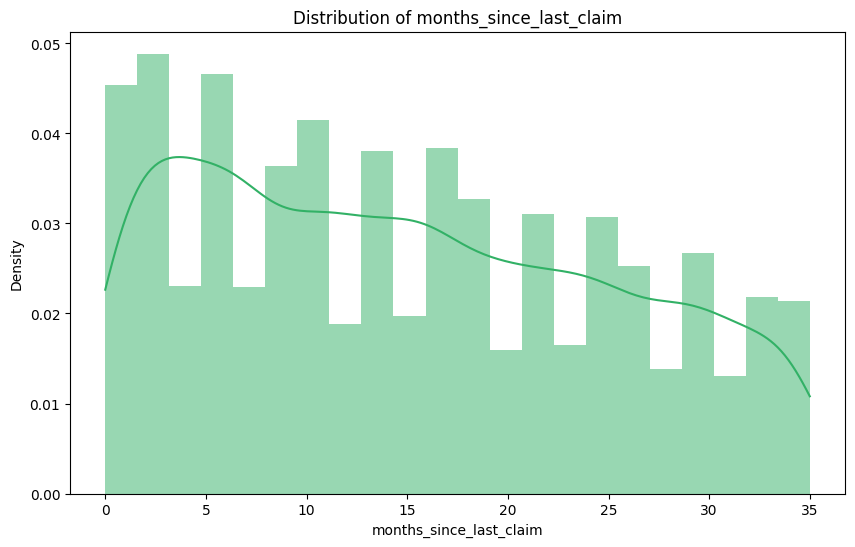

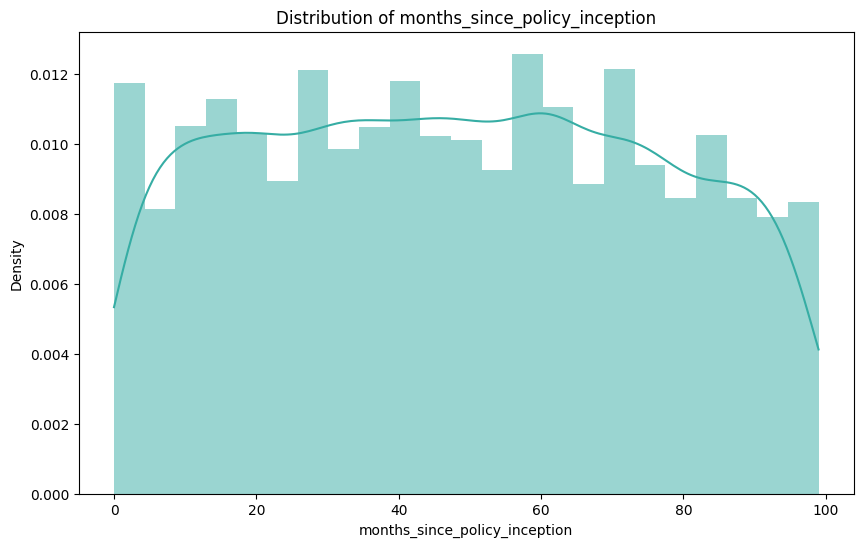

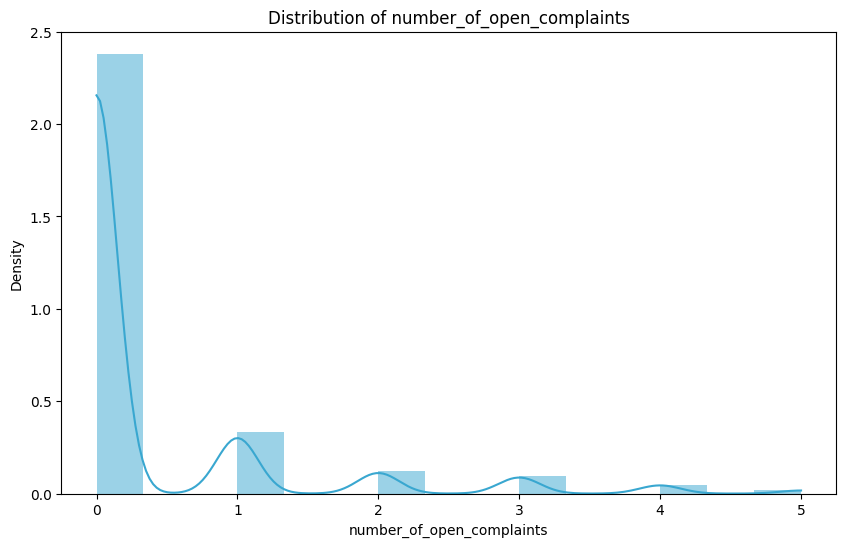

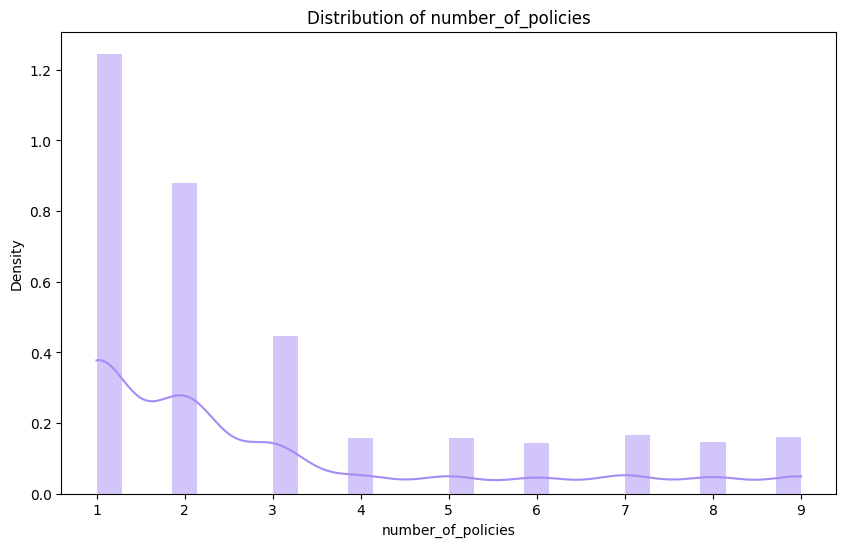

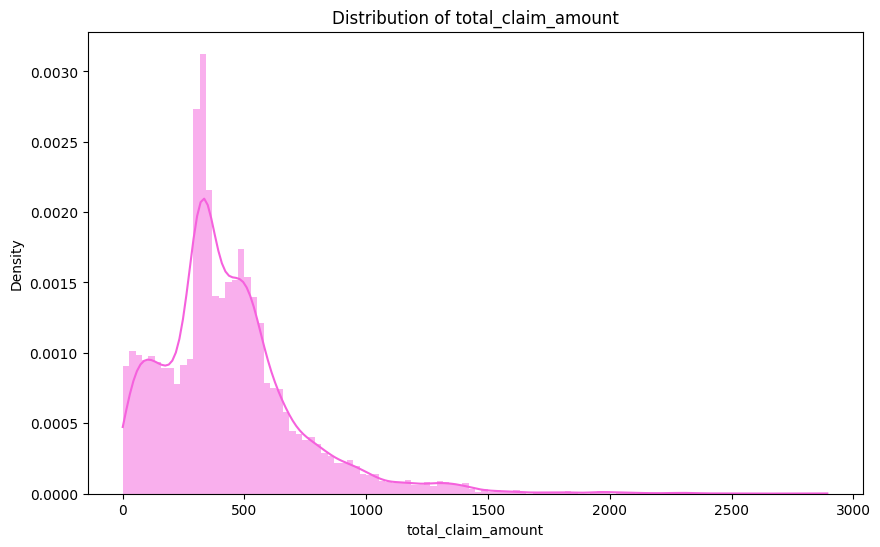

In [3]:
# Create distribution plots for each numerical variable

color_palette = sns.color_palette("husl", len(numerical_data.columns))

for i, column in enumerate(numerical_data.columns):
    plt.figure(figsize=(10, 6))
    sns.histplot(numerical_data[column], kde=True, stat="density", linewidth=0, color=color_palette[i])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

**None of the variables seem to perfectly follow a normal or exponential distribution.**

Some of them have skewed distributions, others are more uniform, and some have a concentration of values at one end of the distribution. Transformations, such as logarithm, can help normalize some of these distributions, especially those with positive skewness and long tails.

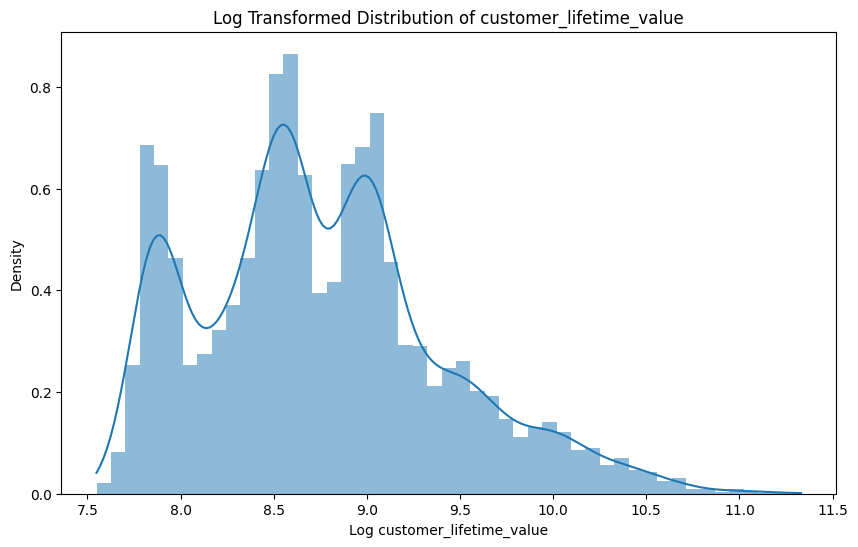

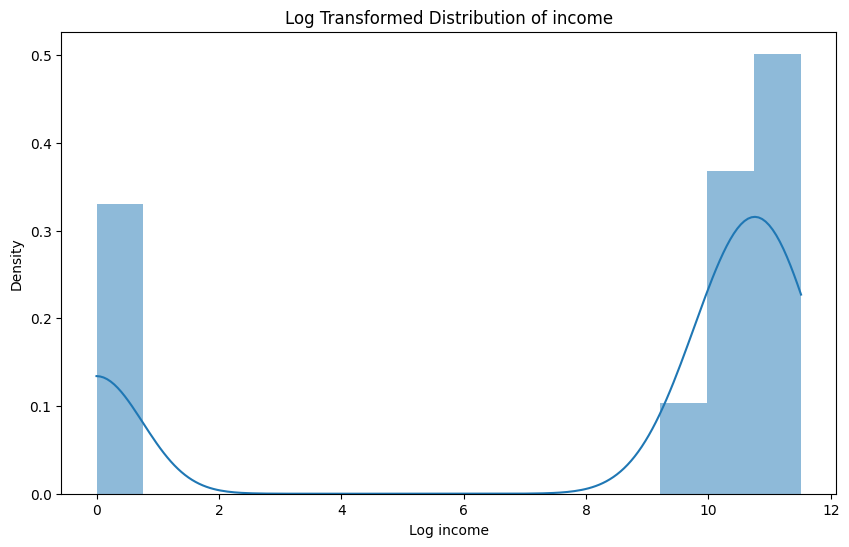

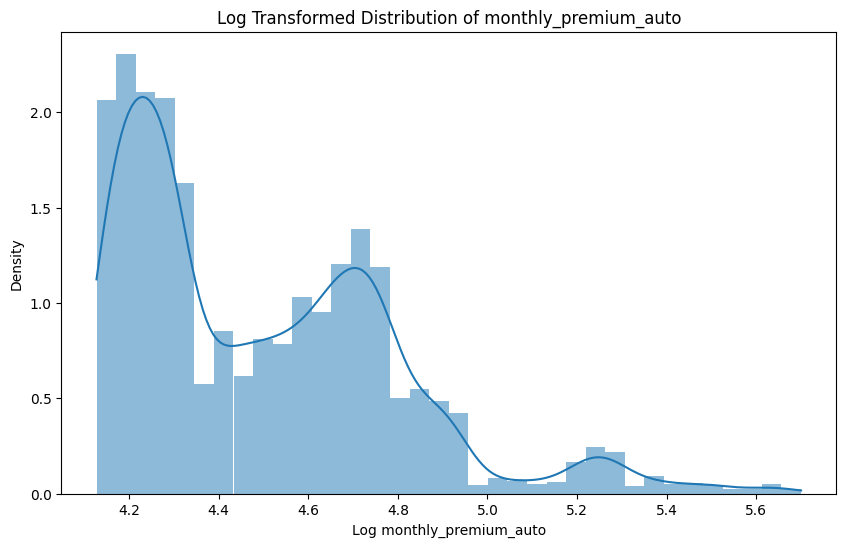

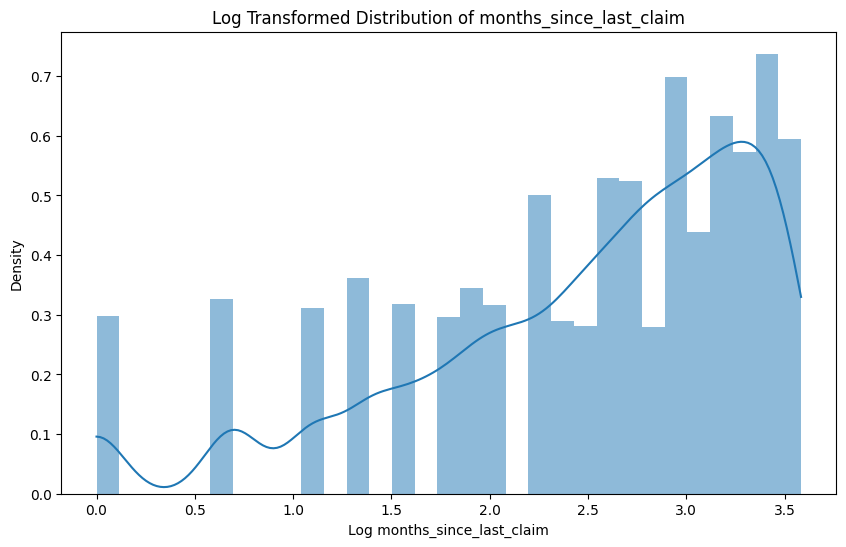

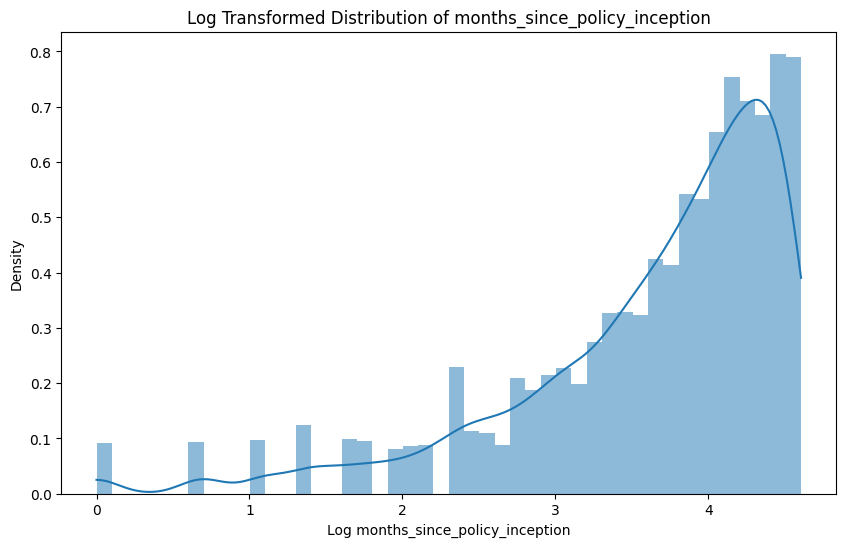

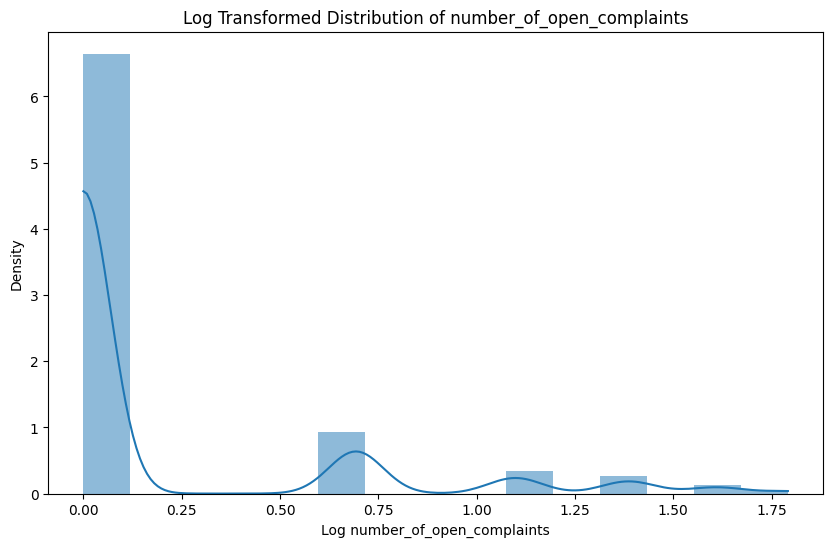

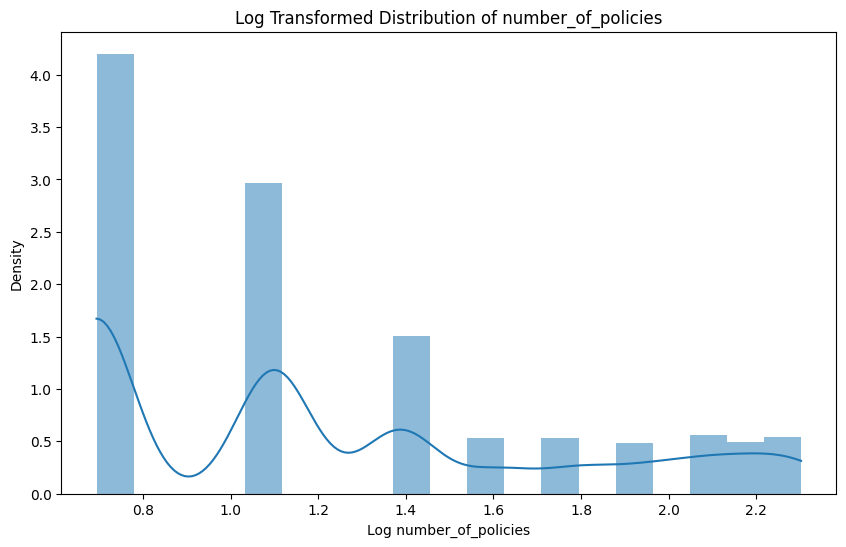

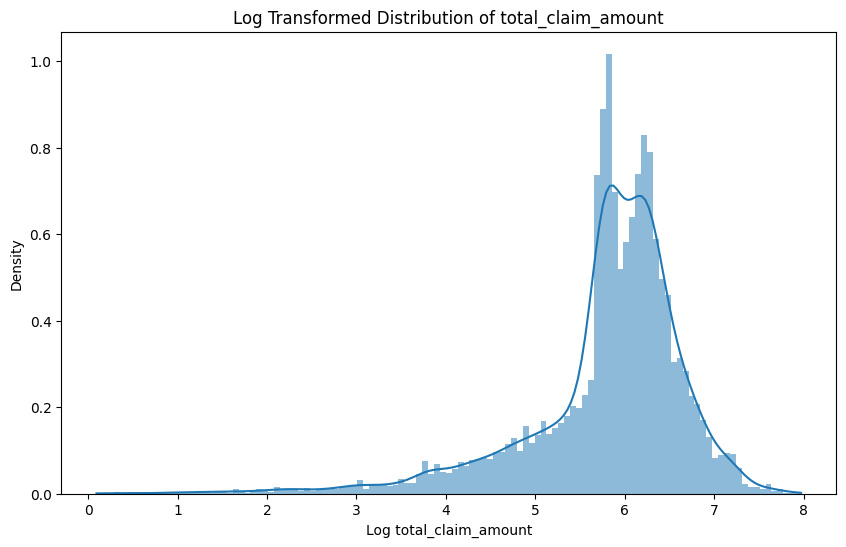

In [4]:
# Apply transformations and re-plot

for column in numerical_data.columns:
    # Avoid logarithm of zero or negative values with a log1p transformation, which is log(1+x)
    transformed_data = np.log1p(numerical_data[column])
    
    plt.figure(figsize=(10, 6))
    sns.histplot(transformed_data, kde=True, stat="density", linewidth=0)
    plt.title(f'Log Transformed Distribution of {column}')
    plt.xlabel('Log ' + column)
    plt.ylabel('Density')
    plt.show()

The logarithmic transformation has had varying effects on different distributions. In some cases, it has helped the distribution approach a normal distribution, while in others, it has not been appropriate, especially in count variables with many zeros or cyclical patterns. These results serve as a reminder that not all transformations work the same way for all variables and should be selected based on the individual characteristics of each dataset.